In [1]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt

%matplotlib inline

nepr_file = os.path.join('podatki/obdelani_podatki', 'nepremicnine.csv')
nepr = pd.read_csv(nepr_file)

In [2]:
nepr['cena_m2'] = nepr['cena'] / nepr['velikost']
nepr

,regija,id,ime_oglasa,vrsta_nepremicnine,tip_nepremicnine,zemljisce,velikost,cena,agencija,leto,cena_m2
0,dolenjska,6366667,MILIČI,Hiša,Samostojna,75074.0,103.00,63000.0,STANART d.o.o.,1954.0,611.650485
1,dolenjska,6367917,NOVO MESTO,Poslovni prostor,Gostinski lokal,671.0,107.40,190000.0,NNRN nepremičnine d.o.o. Novo mesto,1975.0,1769.087523
2,dolenjska,6371197,"NOVO MESTO, BUČNA VAS",Hiša,Samostojna,533.0,119.55,263533.0,"Oridom nepremičnine, Ivan Orešnik s.p.",2020.0,2204.374739
3,dolenjska,6367270,"TREBNJE, ŠTEFAN PRI TREBNJEM",Stanovanje,dvoinpolsobno,NaN,78.60,157000.0,"Ažur Trading, d.o.o.",2019.0,1997.455471
4,dolenjska,6292502,VELIKI GABER,Hiša,Samostojna,522.0,240.00,295000.0,Soseska Gaber d.o.o.,2019.0,1229.166667
...,...,...,...,...,...,...,...,...,...,...,...
16407,zasavska,6183700,"ZAGORJE OB SAVI, MESTO",Posest,Zazidljiva,NaN,3446.00,29.0,"MA - nepremičninska družba, Marko Alič s.p.",NaN,0.008416
16408,zasavska,6329331,"ZAGORJE OB SAVI, OKROGARJEVA KOLONIJA",Posest,Zazidljiva,NaN,4173.00,16.0,NeSta d.o.o.,NaN,0.003834
16409,zasavska,6315241,"ZAGORJE OB SAVI, PODVINE 47",Posest,Zazidljiva,NaN,3954.00,54000.0,Zasebna ponudba,NaN,13.657056
16410,zasavska,6139040,"ZAGORJE OB SAVI, SELO PRI ZAGORJU",Posest,Zazidljiva,NaN,11695.00,199000.0,"Abstract nepremičnine, Igor Kerin s.p.",NaN,17.015819


<AxesSubplot:xlabel='regija'>

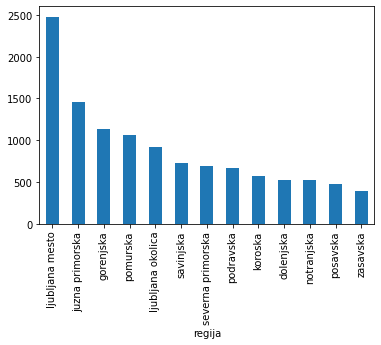

In [3]:
po_regijah = nepr.groupby('regija').mean('cena_m2').sort_values('cena_m2', ascending = False)[['cena_m2']]
po_regijah
po_regijah.cena_m2.plot.bar()

In [4]:
grupiran = nepr[(nepr.leto >= 1980) & (nepr.cena_m2 >= 1)& (nepr.cena_m2 <= 10000)].groupby(["leto"])

In [5]:
letna_povprecja = nepr[(nepr.leto >= 1980) & (nepr.cena_m2 >= 1)& (nepr.cena_m2 <= 10000)].groupby(["regija","leto"]).mean('cena_m2')
letna_povprecja = letna_povprecja[['cena_m2']]

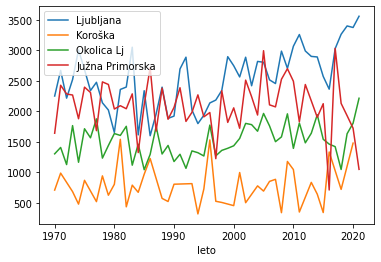

In [20]:
nepr[(nepr.regija == "ljubljana mesto") & (nepr.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
nepr[(nepr.regija == "koroska") & (nepr.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
nepr[(nepr.regija == "ljubljana okolica") & (nepr.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
ax = nepr[(nepr.regija == "juzna primorska") & (nepr.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
ax.legend(["Ljubljana", "Koroška", "Okolica Lj","Južna Primorska"])



In [57]:
vel = nepr[['velikost','cena_m2']]

#velikost = nepr[(nepr.cena_m2 <= 10000) & (nepr.velikost <= 40000) & (nepr.cena_m2 >= 1)].groupby('velikost').mean('cena_m2').sort_values("cena_m2",ascending = False)
#velikost

In [60]:
vrste = nepr.groupby('vrsta_nepremicnine')
vrste.size()

vrsta_nepremicnine
Garaža                121
Hiša                 5103
Posest               5067
Poslovni prostor     2091
Počitniški objekt     177
Stanovanje           3335
Vikend                518
dtype: int64

<AxesSubplot:xlabel='vrsta_nepremicnine'>

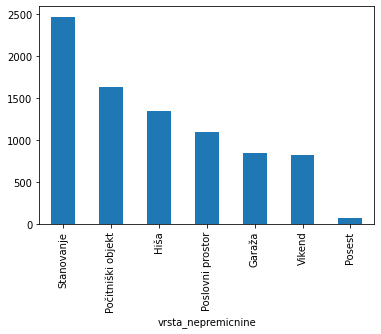

In [62]:
nepr.groupby('vrsta_nepremicnine').mean('cena_m2').sort_values('cena_m2',ascending = False).cena_m2.plot.bar()